# Run the whole deltas algorithm

In [1]:
%load_ext autoreload
%autoreload 2

import deltas.pipeline.run as run
from deltas.model import SSL

## Get data

In [2]:
N1 = 10000
N2 = 10
data_clf = run.get_non_sep_data(
    N1=N1,
    N2=N2,
    scale=True)

## Get Classifier

clf


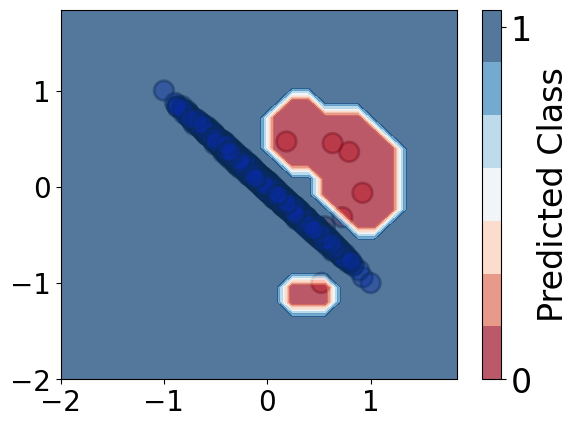

SMOTE


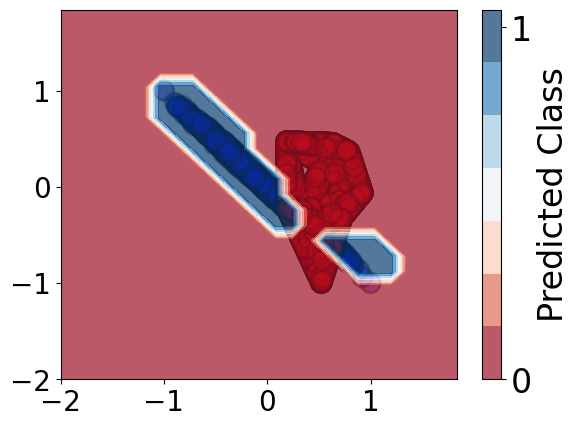

In [3]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
balance_clf = False

data_clf['clf'], clf_SMOTE = run.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

## Fit deltas

Original Data


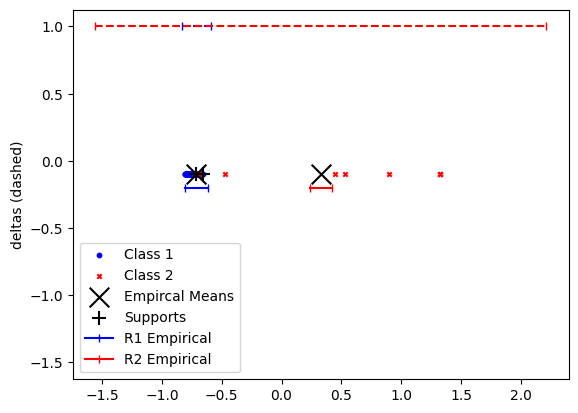

Unable to find result with SSL, increase the max_trials


In [4]:
from deltas.model import downsample
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = as.reprojection_deltas(
deltas_model = SSL.SSL_deltas(
# deltas_model = downsample.downsample_deltas(
    clf,
).fit(X, y, _print=True, _plot=True, max_trials=100000, parallel=True)

## Show parameters

In [5]:
deltas_model.print_params()
deltas_model.print_deltas()

Not fit to any data yet, call 'fit(X, y)' or  method first


# Evaluation on test data

In [6]:
mdels = {'original': clf,
         'SMOTE': clf_SMOTE,
         'deltas': deltas_model}
run.eval_test(mdels,
                       data_clf['data_test'], _print=True, _plot=True)

AttributeError: Not fit to any data yet, call 'fit(X, y)' or  method first